In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

In [71]:
# read in an image as a numpy array (preferably of size 2048x2048 px)
class ImageShuffle:
    def __init__(self, image):
        self.image_in = image                                                   # input image
        self.image_out = np.asarray(Image.open('images/im_backfold.png'))       # import background as output image template
        self.image_back = np.asarray(Image.open('images/im_image_back.png'))    # import backside of the final fold
        self.image_width = len(self.image_in)                                   # width of the image (should be a squared multiple of 4)
        self.square_width = int(self.image_width / 4 + 0.1)                     # width of each quadrant


    # show segmented image
    def show_image(self):
        image_segmented = self.image_in.copy()
        print(image_segmented.shape)
        for i in range(4):
            image_segmented[i*self.square_width] = np.zeros_like((1, self.image_width, 3))
        plt.imshow(image_segmented)


    # returns an image triangle of matrix position (m, n) and orientation ('TL' or 'DL' or 'DR' or 'TR') and returns it as a 'TL' triangle added to a squared 0-array
    def get_triangle(self, m, n, orientation, image_back = False):
        # define square to select pixels from (front or back) 
        if image_back:
            array_in = self.image_back[m*self.square_width:(m+1)*self.square_width, n*self.square_width:(n+1)*self.square_width]
        else:
            array_in = self.image_in[m*self.square_width:(m+1)*self.square_width, n*self.square_width:(n+1)*self.square_width]
        array_out = np.zeros((self.square_width, self.square_width, 3), dtype = np.uint8)
        # fill output array according to orientation
        for i in range(self.square_width):
            for j in range(i+1):
                # input array has rectangle at top-left 'TL' corner
                if orientation == 'TL':
                    array_out[j,self.square_width-1-i] = array_in[j,self.square_width-1-i]
                # input array has rectangle at down-left 'DL' corner
                elif orientation == 'DL':
                    array_out[j,self.square_width-1-i] = array_in[i,j]
                # input array has rectangle at down-right 'DR' corner
                elif orientation == 'DR':
                    array_out[j,self.square_width-1-i] = array_in[self.square_width-1-j,i]
                # input array has rectangle at top-right 'TR' corner
                elif orientation == 'TR':
                    array_out[j,self.square_width-1-i] = array_in[self.square_width-1-i,self.square_width-1-j]
        return array_out


    # adds (!) a triangle to the output image at matrix position (m, n) and orientation ('TL' or 'DL' or 'DR' or 'TR')
    def insert_triangle(self, triangle_in, m, n, orientation):
        temp_array = np.zeros((self.square_width, self.square_width))
        # fill temp array according to orientation
        for i in range(self.square_width):
            for j in range(i+1):
                # input array has rectangle at top-left 'TL' corner
                if orientation == 'TL':
                    temp_array[j,self.square_width-1-i] = triangle_in[j,self.square_width-1-i]
                # input array has rectangle at down-left 'DL' corner
                elif orientation == 'DL':
                    temp_array[i,j] = triangle_in[j,self.square_width-1-i]
                # input array has rectangle at down-right 'DR' corner
                elif orientation == 'DR':
                    temp_array[self.square_width-1-j,i] = triangle_in[j,self.square_width-1-i]
                # input array has rectangle at top-right 'TR' corner
                elif orientation == 'TR':
                    temp_array[self.square_width-1-i,self.square_width-1-j] = triangle_in[j,self.square_width-1-i]
        # add temp array to appropriate output image matrix position m, n
        self.image_out[m*self.square_width:(m+1)*self.square_width, n*self.square_width:(n+1)*self.square_width] = temp_array
        return
    

    def shuffle_image(shuffle_dataframe):
        len_dataframe = len(shuffle_dataframe)
        # for 
        return
    

    def shuffle_image_back(shuffle_dataframe):
        return

(1024, 1024, 3)


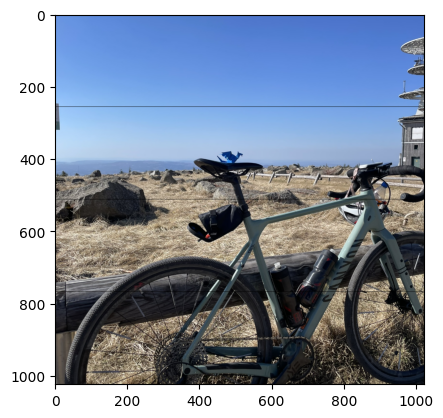

In [72]:
# read in image as array
image_didaktik = Image.open('images/motives/AG_Didaktik.png')
image_didaktik_array = np.asarray(image_didaktik)

image_nhk = Image.open('images/motives/NHK.png')
image_nhk_array = np.asarray(image_nhk)

image_brockendrache = Image.open('images/motives/Brocken_Drache.png').convert('RGB')
image_brockendrache_array = np.asarray(image_brockendrache)

# initialize shuffle class
didaktik_shuffle = ImageShuffle(image_didaktik_array)
brockendrache_shuffle = ImageShuffle(image_brockendrache_array)

m2n2_dl = didaktik_shuffle.get_triangle(2, 2, 'DL')
# image_didaktik
# image_nhk
image_brockendrache
brockendrache_shuffle.show_image()
